# Automobile Insurance Claims Analysis

This is an exploratory data analysis on the automobile insurance claims dataset, which was downloaded from Kaggle via opendatasets library. The aim is to find out the possible information and insights of claims and make sense of the dataset.

---

1.1 Using opendatasets library to download the kaggle dataset.

In [1]:
import opendatasets as od

In [2]:
od.download('https://www.kaggle.com/datasets/aashishjhamtani/automobile-insurance')

Skipping, found downloaded files in ".\automobile-insurance" (use force=True to force download)


1.2 Importing required modules and libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

%matplotlib inline

1.3 Checking dataset info

_Looking to clean data for ease of analysis_

In [4]:
insurance_claims_raw_df = pd.read_csv('automobile-insurance/insurance_claims.csv')
insurance_claims_raw_df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


---
2.1 Data Cleaning

---

In [5]:
from IPython.display import display
with pd.option_context('display.max_columns', 40):
    display(insurance_claims_raw_df)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,2015-02-22,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,2015-01-24,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,2015-01-23,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,2015-02-26,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


_Dropping '_c39' column since it contains no data_

In [6]:
insurance_claims_raw_df.drop('_c39', axis = 'columns', inplace=True)
with pd.option_context('display.max_columns', 40):
    display(insurance_claims_raw_df)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,2015-02-22,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,2015-01-24,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,2015-01-23,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,2015-02-26,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


`collision_type` _includes_ `?` _as the in the_ `incident_type` _it's clearly not a type of collision._

In [7]:
with pd.option_context('display.max_rows', 1000):
    display(insurance_claims_raw_df[['incident_type', 'collision_type']])

,incident_type,collision_type
0,Single Vehicle Collision,Side Collision
1,Vehicle Theft,?
2,Multi-vehicle Collision,Rear Collision
3,Single Vehicle Collision,Front Collision
4,Vehicle Theft,?
5,Multi-vehicle Collision,Rear Collision
6,Multi-vehicle Collision,Front Collision
7,Multi-vehicle Collision,Front Collision
8,Single Vehicle Collision,Front Collision
9,Single Vehicle Collision,Rear Collision


_Replacing it with the object dtype i.e. string_ `'Not a collision'` _using_ `.replace()` _in the pandas library._

In [8]:
insurance_claims_raw_df.collision_type.replace(to_replace='?', value='Not a collision', inplace=True)
with pd.option_context('display.max_rows', 1000):
    display(insurance_claims_raw_df[['incident_type', 'collision_type']])

,incident_type,collision_type
0,Single Vehicle Collision,Side Collision
1,Vehicle Theft,Not a collision
2,Multi-vehicle Collision,Rear Collision
3,Single Vehicle Collision,Front Collision
4,Vehicle Theft,Not a collision
5,Multi-vehicle Collision,Rear Collision
6,Multi-vehicle Collision,Front Collision
7,Multi-vehicle Collision,Front Collision
8,Single Vehicle Collision,Front Collision
9,Single Vehicle Collision,Rear Collision


---
## Key Statistics
These are some key statistics that will help in understanding some facts about the dataset.


### Total Claim Amount

In [9]:
grand_total_claim_amount = insurance_claims_raw_df.total_claim_amount.sum()
grand_total_claim_amount

52761940

In [10]:
print('The grand total of the claim amount is ${0:.02f}M'.format(grand_total_claim_amount/1e6))

The grand total of the claim amount is $52.76M


Total Claim Amount = `$52.76M`

### Total Claimants Count

In [11]:
total_claimants_count = insurance_claims_raw_df.total_claim_amount.count()
total_claimants_count

1000

In [12]:
print('The number of total claimants in this study are {}'.format(total_claimants_count))

The number of total claimants in this study are 1000


Total number of claimants = `1000`

### Largest Claim Amount

In [13]:
max_claim_amount = insurance_claims_raw_df.total_claim_amount.max()
max_claim_amount

114920

In [14]:
print('The largest claim amount incurred is ${0:.02f}K'.format(max_claim_amount/1e3))

The largest claim amount incurred is $114.92K


Largest Claim Amount = `$114.92K`

---
## Claimant Demographics
To understand some background of the claimants.

### Claimant Gender Distribution

In [15]:
gender_counts = insurance_claims_raw_df.insured_sex.value_counts()
gender_counts

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

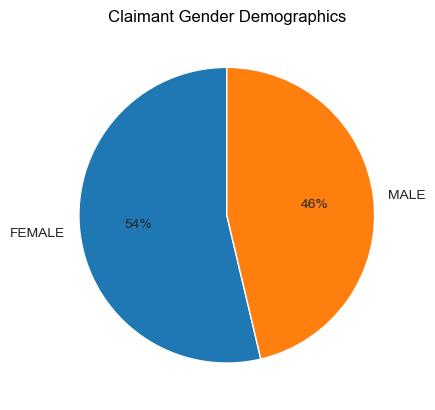

In [16]:
plt.title('Claimant Gender Demographics')
sns.set_style('ticks')
plt.pie(gender_counts, labels= gender_counts.index, autopct= '%.0f%%', startangle=90);

_There are a higher number of female claimants possibly indicating there's a higher number of accidents from the females here_

### Occupation Demographics

In [17]:
occupation_counts = insurance_claims_raw_df.insured_occupation.value_counts()
occupation_pct = occupation_counts*100/insurance_claims_raw_df.insured_occupation.count()
occupation_pct

machine-op-inspct    9.3
prof-specialty       8.5
tech-support         7.8
sales                7.6
exec-managerial      7.6
craft-repair         7.4
transport-moving     7.2
other-service        7.1
priv-house-serv      7.1
armed-forces         6.9
adm-clerical         6.5
protective-serv      6.3
handlers-cleaners    5.4
farming-fishing      5.3
Name: insured_occupation, dtype: float64

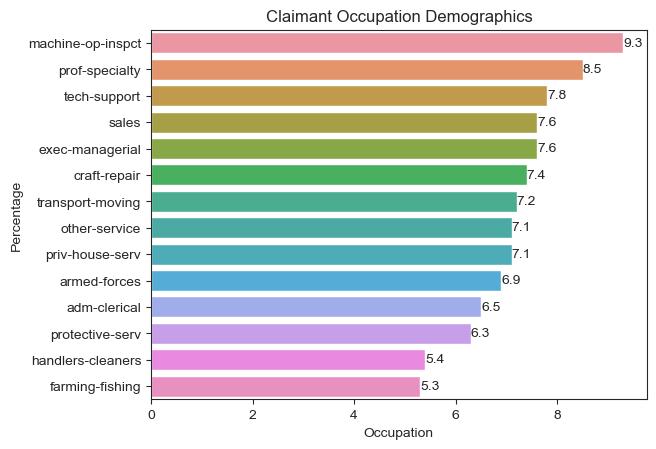

In [18]:
plt.title('Claimant Occupation Demographics')
occupation_plot = sns.barplot(y= occupation_pct.index, x= occupation_pct, orient= 'h', data= insurance_claims_raw_df)
plt.xlabel('Occupation')
plt.ylabel('Percentage');

for i in occupation_plot.containers:
    occupation_plot.bar_label(i)

_More than 9% people are machine operation inspectors_

### Top 5 Hobbies Demographics

In [19]:
hobbies_pct_all = (insurance_claims_raw_df.insured_hobbies.value_counts()*100/insurance_claims_raw_df.insured_hobbies.count())
hobbies_pct_all

reading           6.4
exercise          5.7
paintball         5.7
bungie-jumping    5.6
movies            5.5
golf              5.5
camping           5.5
kayaking          5.4
yachting          5.3
hiking            5.2
video-games       5.0
skydiving         4.9
base-jumping      4.9
board-games       4.8
polo              4.7
chess             4.6
dancing           4.3
sleeping          4.1
cross-fit         3.5
basketball        3.4
Name: insured_hobbies, dtype: float64

In [20]:
hobbies_pct = (insurance_claims_raw_df.insured_hobbies.value_counts()*100/insurance_claims_raw_df.insured_hobbies.count()).head(5)

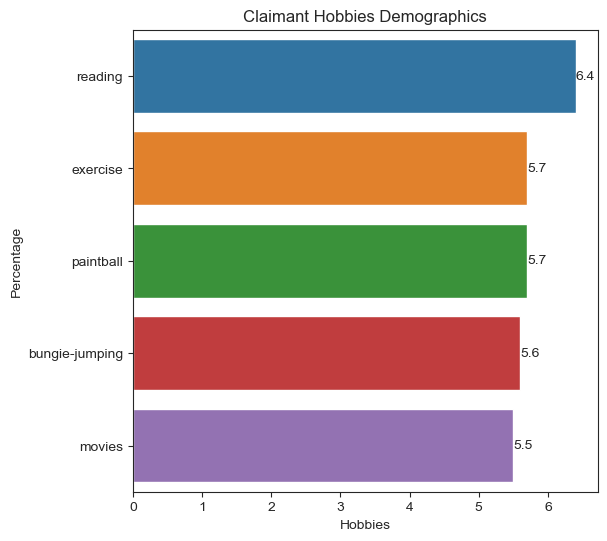

In [21]:
plt.figure(figsize = (6,6))
plt.title('Claimant Hobbies Demographics')
hobbies_plot = sns.barplot(y= hobbies_pct.index, x= hobbies_pct, orient= 'h', data= insurance_claims_raw_df)
plt.xlabel('Hobbies')
plt.ylabel('Percentage');

for i in hobbies_plot.containers:
    hobbies_plot.bar_label(i)

_Over 6% people having specified their hobby as reading, followed by exercise and paintball_

### Highest Education Level Demographics

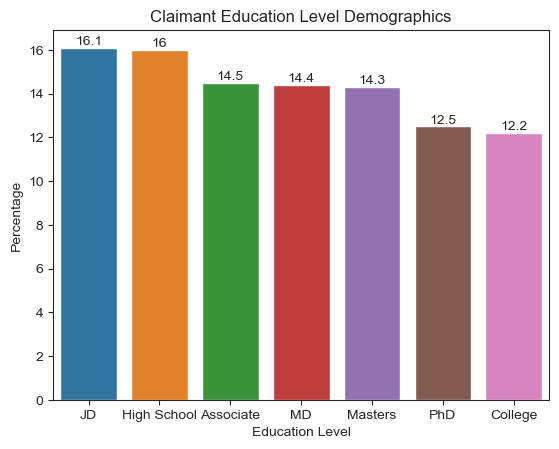

In [22]:
education_pct = (insurance_claims_raw_df.insured_education_level.value_counts()*100/insurance_claims_raw_df.insured_education_level.count())
education_pct

plt.title('Claimant Education Level Demographics')
education_plot = sns.barplot(x= education_pct.index, y= education_pct, data = insurance_claims_raw_df)
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt;

for i in education_plot.containers:
    education_plot.bar_label(i)

_Over 32% are JD (Juris Doctor) and High School as their highest education level_

### Claimant Age Group

_Creating a function to create an_ `age_group` _column_

In [23]:
def age_group(col_series):
    age_group = []
    for idx, value in col_series.items():
        for i, j in zip(range(18, 63, 4), range(22, 67, 4)):
            if value in range(i, j):
                age_group.append(f'{i}-{j-1}')
            
    return age_group

In [24]:
insurance_claims_raw_df['age_group'] = age_group(insurance_claims_raw_df.age)

In [25]:
with pd.option_context('display.max_columns', 40):
    display(insurance_claims_raw_df)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,age_group
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,46-49
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,Not a collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,42-45
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,26-29
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,38-41
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,Not a collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,42-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,2015-02-22,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,38-41
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,2015-01-24,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,38-41
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,2015-01-23,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,34-37
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,2015-02-26,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,62-65


In [26]:
age_group_counts = insurance_claims_raw_df.age_group.value_counts()
age_group_pct = age_group_counts*100/age_group_counts.sum()

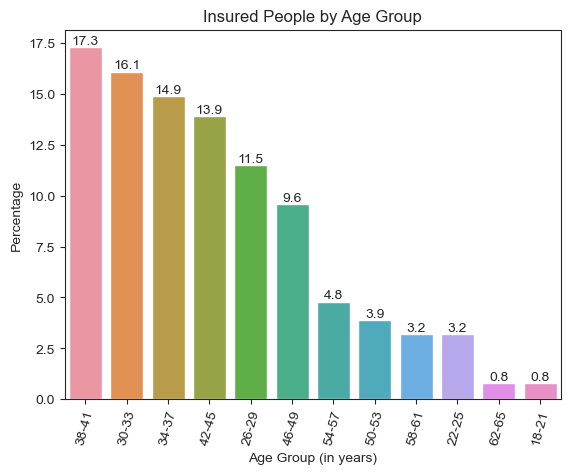

In [27]:
age_group_plot = sns.barplot(x = age_group_pct.index, y = age_group_pct, data = insurance_claims_raw_df)
plt.title('Insured People by Age Group')
plt.xticks(rotation = 75)
plt.xlabel('Age Group (in years)')
plt.ylabel('Percentage');

for i in age_group_plot.containers:
    age_group_plot.bar_label(i,)

_Interestingly, the age group from 26-49 seems to have over 85% majority, which seems to be the active working age, with 38-41 age group being the highest with over 17% majority_

Digging more information using `sns.countplot()`, to leverage the `hue` argument in order to find out the gender divide.

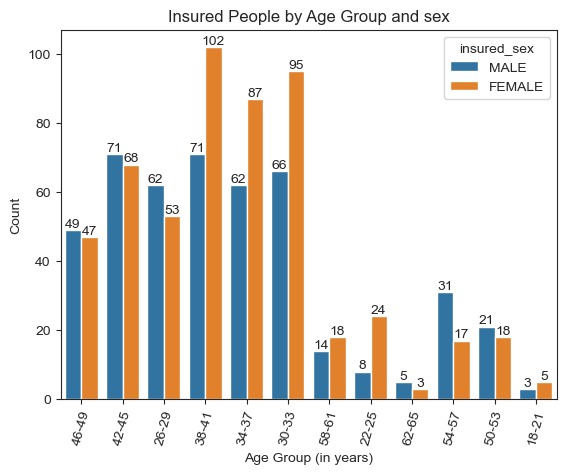

In [28]:
age_group_sex_plot = sns.countplot(x = 'age_group', hue = 'insured_sex', data = insurance_claims_raw_df)
plt.title('Insured People by Age Group and sex')
plt.xticks(rotation = 75)
plt.xlabel('Age Group (in years)')
plt.ylabel('Count');

for i in age_group_sex_plot.containers:
    age_group_sex_plot.bar_label(i,)

_Females are the dominant group in the_ `38-41`_age group followed by_ `34-37`_,_ `30-33`_,  while the males dominate the_ `42-49` _range._

### Car models and makes in the accidents

In [29]:
cars_used_pct = insurance_claims_raw_df.auto_model.value_counts()*100/insurance_claims_raw_df.auto_model.count()
cars_used_pct = cars_used_pct.head(10)

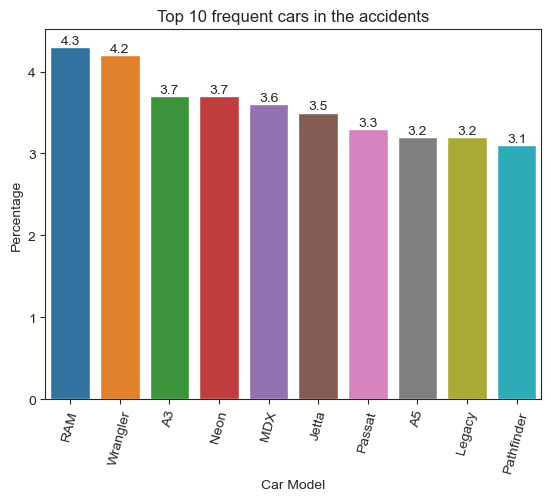

In [30]:
plt.title('Top 10 frequent cars in the accidents')
car_used_plot = sns.barplot(x= cars_used_pct.index, y= cars_used_pct, data= insurance_claims_raw_df)
plt.xticks(rotation = 75)
plt.xlabel('Car Model')
plt.ylabel('Percentage');

for i in car_used_plot.containers:
    car_used_plot.bar_label(i)

_Although there's not a sinificant skewness in the plot, RAM which is made by Ford has been involved in more accidents (4.3%, followed by Wrangler with 4.2%) relatively_

In [31]:
make_used_pct = insurance_claims_raw_df.auto_make.value_counts()*100/insurance_claims_raw_df.auto_make.count()
make_used_pct = make_used_pct.head(10)

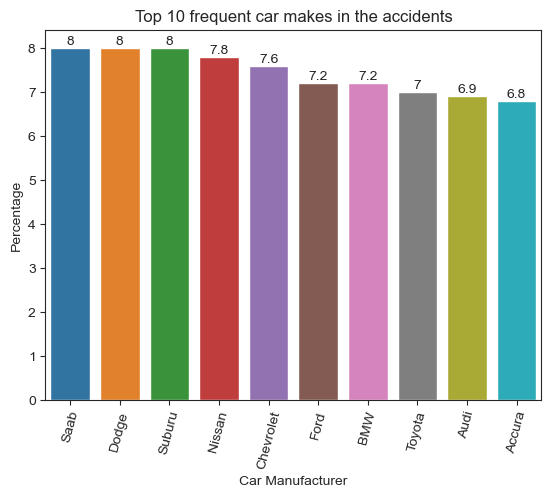

In [32]:
plt.title('Top 10 frequent car makes in the accidents')
make_used_plot = sns.barplot(x= make_used_pct.index, y= make_used_pct, data= insurance_claims_raw_df)
plt.xticks(rotation = 75)
plt.xlabel('Car Manufacturer')
plt.ylabel('Percentage');

for i in make_used_plot.containers:
    make_used_plot.bar_label(i)

_Although `RAM` made by `Ford` was leading the accidents majority, `SAAB` and `Dodge` seems to have more cars (Total `16%`, `8%` each) finding themselves in a accident_

### Claimant Gender and their policy state

In [33]:
gender_per_state_df = pd.crosstab(insurance_claims_raw_df.policy_state, insurance_claims_raw_df.insured_sex)
gender_per_state_df

insured_sex,FEMALE,MALE
policy_state,,
IL,179,159
IN,163,147
OH,195,157


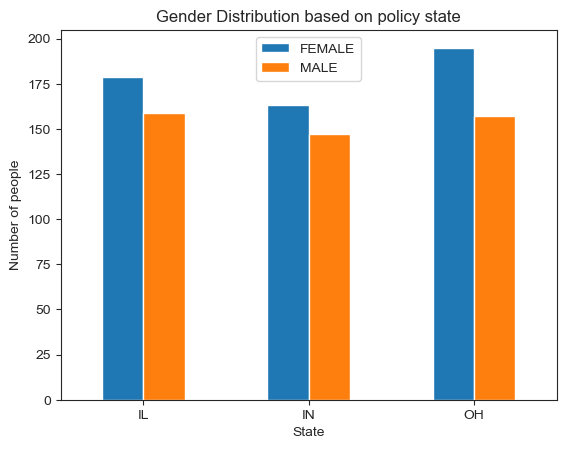

In [34]:
gender_per_state_df.plot(kind= 'bar')
plt.title('Gender Distribution based on policy state')
plt.xlabel('State')
plt.ylabel('Number of people')
plt.xticks(rotation = 0)
plt.legend();

_This data seems to have insurance policies data collected from Illinois `IL`, Indiana `IN` and Ohio `OH`._<br>
_With that said, females population seems to be a slightly major portion compared to males and no mentioned state has unproportionate count of insured males or females._

## Accidents based on location and hour of the day
This data has incident reports from January, February and March, from the year 2015. The aim to visualise the distribution and find some information about the incidents taking place.

In [35]:
city_accidents_df = pd.crosstab(insurance_claims_raw_df.incident_hour_of_the_day, insurance_claims_raw_df.incident_city)

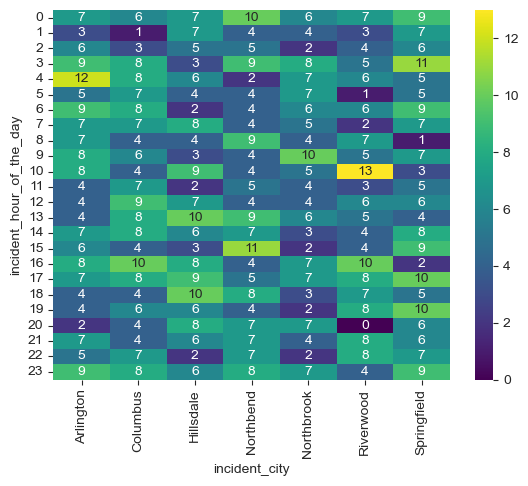

In [36]:
sns.heatmap(city_accidents_df, annot=True, cmap= 'viridis');

_With respect to the limited data available, the number of incidents per city based on the hour of the day indicates as follows:_<br>
_1. `Arlington` has more incidents early morning._<br> 
_2. `Columbus` has more incidents 11 AM - 5 PM._<br> 
_3. `Hillsdate` has a high concentration of incidents happening around late afternoon and early evening hours._<br> 
_4. `Northbend` has more incidents late and midnight._<br> 
_5. `Northbrook` seems to have less number of incidents overall but it does have some spikes as shown by the heatmap._<br> 
_6. `Riverwood` has more incidents from evening to night period._<br>
_7. `Springfield` observes less accident mid-day than other hours._<br> 

Now, checking the mean number of vehicles involed in an incident throughout the day in the states where these incidents happened.

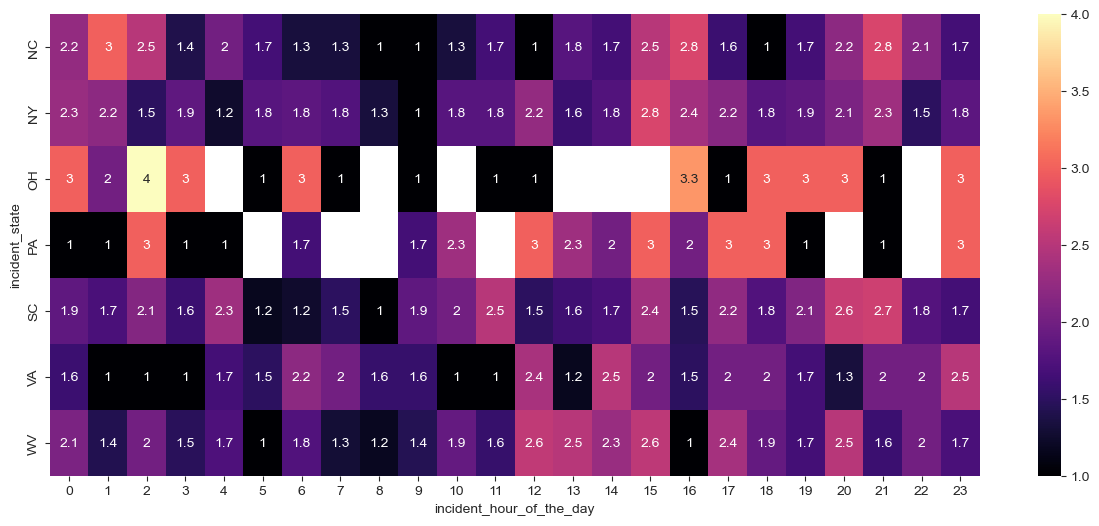

In [37]:
plt.figure(figsize=(15,6))
sns.heatmap(insurance_claims_raw_df.pivot_table('number_of_vehicles_involved', 'incident_hour_of_the_day', 'incident_state').transpose(), annot=True, cmap= 'magma');

_The heatmap indicates a higher concentration in the late afternoon to late evening hours, (Roughly, 3 PM - 8 PM), with Ohio `OH` showing some high numbers throughout the day. Which corresponds to official leave time for most workplaces._

In [88]:
witnesses_per_hour = insurance_claims_raw_df.groupby('incident_hour_of_the_day')['witnesses'].sum()
witnesses_per_hour_df = pd.DataFrame(witnesses_per_hour).transpose()
witnesses_per_hour_df1 = pd.DataFrame(witnesses_per_hour)
witnesses_per_hour_df

incident_hour_of_the_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
witnesses,86,33,49,62,74,55,64,53,54,62,...,56,60,76,86,62,60,52,46,54,84


In [39]:
witnesses_by_hour = pd.crosstab(insurance_claims_raw_df.witnesses, insurance_claims_raw_df.incident_hour_of_the_day)
witnesses_by_hour

incident_hour_of_the_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
witnesses,,,,,,,,,,,,,,,,,,,,,
0,11,8,4,18,8,4,13,10,9,11,...,14,8,12,12,8,11,7,17,13,13
1,13,12,10,18,11,10,6,16,10,13,...,10,11,12,14,12,6,9,9,7,9
2,11,6,12,7,18,12,17,5,7,8,...,11,11,11,12,13,15,11,11,7,12
3,17,3,5,10,9,7,8,9,10,11,...,8,9,14,16,8,8,7,5,11,17


### Witnesses at the time of incidents

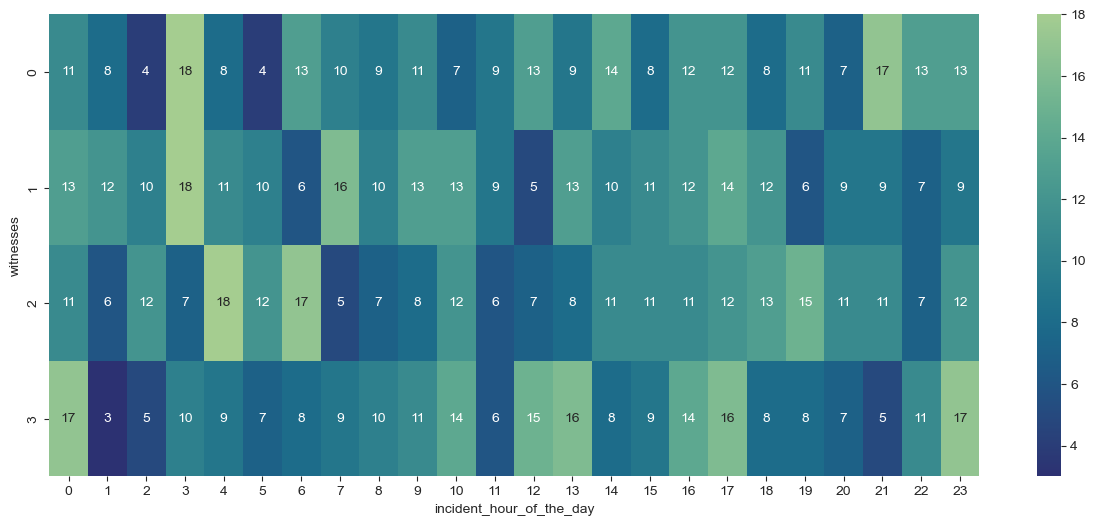

In [79]:
plt.figure(figsize=(15,6))
sns.heatmap(witnesses_by_hour, annot=True, fmt = 'd', cmap = 'crest_r');

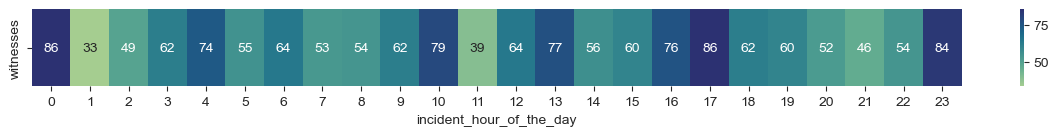

In [41]:
plt.figure(figsize=(15,1))
sns.heatmap(witnesses_per_hour_df, annot=True, fmt = 'd', cmap = 'crest');

<AxesSubplot:xlabel='Hour of the day', ylabel='Witnesses'>

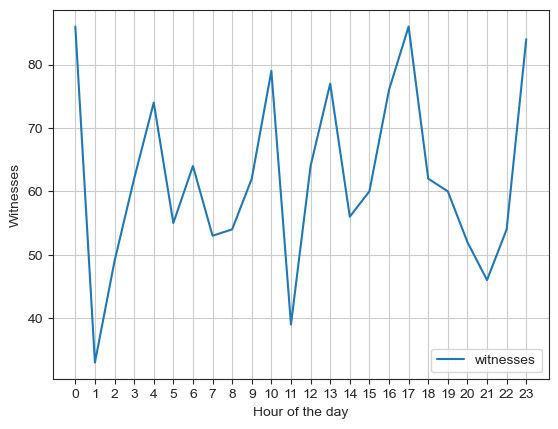

In [94]:
witnesses_per_hour_df1.plot(kind = 'line', grid= True, xticks = list(range(0,24)), xlabel= 'Hour of the day', ylabel = 'Witnesses')

_The number of witnesses gradually increase at midnight then vary throughout the day with peaks at 4 AM, 10 AM, 1 PM and 5 PM._<br>

_Let's compare it with the number of incidents by the hour of the day that is using_  `incident_hour_of_the_day` and `.plot()`.

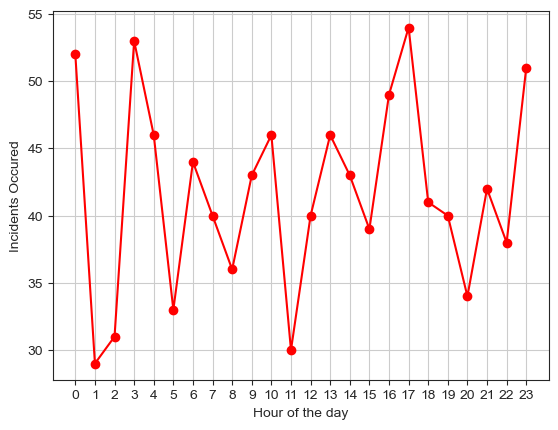

In [124]:
incident_hour_count = insurance_claims_raw_df.groupby('incident_hour_of_the_day')['incident_hour_of_the_day'].count()
plt.plot(incident_hour_count, 'o-r')
plt.grid(True)
plt.xticks(list(range(0,24)))
plt.xlabel('Hour of the day')
plt.ylabel('Incidents Occured');

_It is clear that, the number of incidents corresponds to the rise in witnesses._

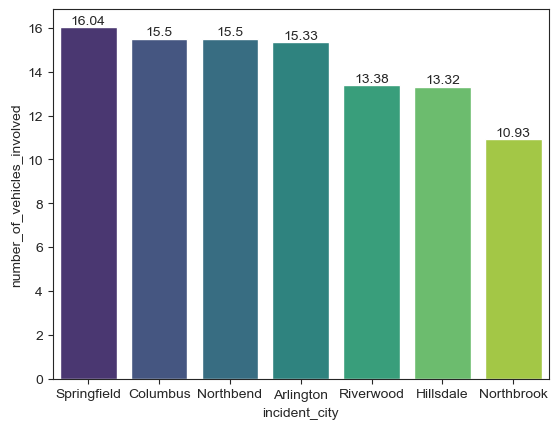

In [42]:
city_vehicles_involved = insurance_claims_raw_df.groupby('incident_city')['number_of_vehicles_involved'].sum()

city_vehicles_involved_pct = round(city_vehicles_involved*100/city_vehicles_involved.sum(), 2)
city_vehicles_involved_pct_sorted = city_vehicles_involved_pct.sort_values(ascending=False)

city_vehicles_involved_plot = sns.barplot(x= city_vehicles_involved_pct_sorted.index, y= city_vehicles_involved_pct_sorted, palette= 'viridis');

for i in city_vehicles_involved_plot.containers:
    city_vehicles_involved_plot.bar_label(i,)

`Springfield` _observed just over_ `16%` _number of vehicles involved as the majority of all the cities mentioned._

## Incident Type Distribution and severity

In [43]:
incident_type_pct = insurance_claims_raw_df.incident_type.value_counts()*100/insurance_claims_raw_df.incident_type.count()
incident_type_pct

Multi-vehicle Collision     41.9
Single Vehicle Collision    40.3
Vehicle Theft                9.4
Parked Car                   8.4
Name: incident_type, dtype: float64

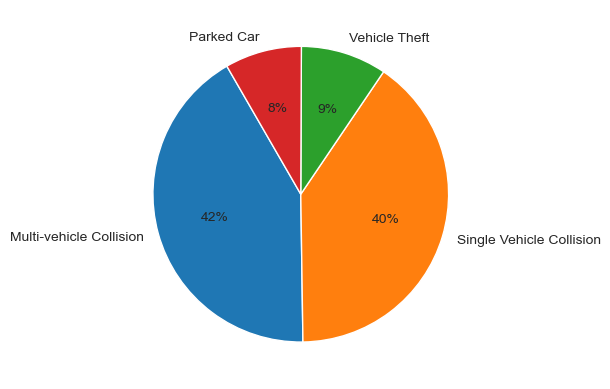

In [44]:
plt.pie(x= incident_type_pct, labels=incident_type_pct.index, autopct="%.0f%%", startangle=120);

In [45]:
incident_severity_pct = insurance_claims_raw_df.incident_severity.value_counts()*100/insurance_claims_raw_df.incident_severity.count()
incident_severity_pct

Minor Damage      35.4
Total Loss        28.0
Major Damage      27.6
Trivial Damage     9.0
Name: incident_severity, dtype: float64

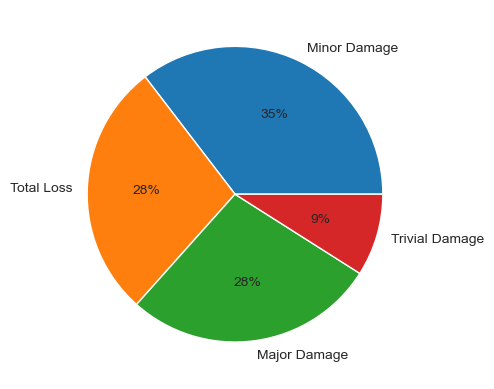

In [46]:
plt.pie(x= incident_severity_pct, labels=incident_severity_pct.index, autopct="%.0f%%", startangle=0);

### Claim Amount Information

Highest Education Level and the corresponding claim amount

In [47]:
education_claim_amt_df = insurance_claims_raw_df.groupby('insured_education_level')[['total_claim_amount']].mean()
education_claim_amt_df

,total_claim_amount
insured_education_level,
Associate,48907.793103
College,51978.770492
High School,52225.562500
JD,51490.745342
MD,55296.875000
Masters,54464.335664
PhD,55453.200000


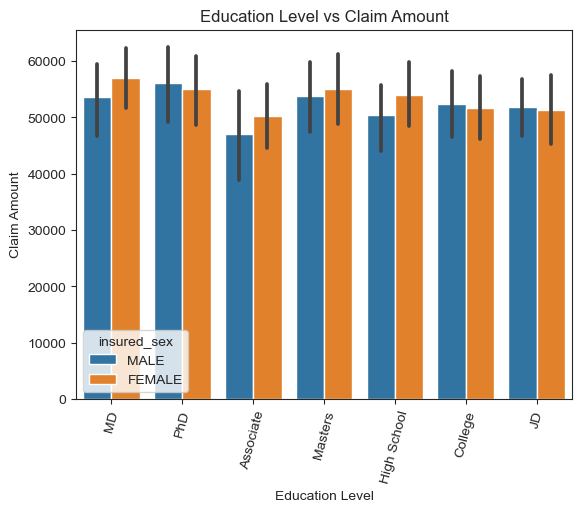

In [48]:
edu_claim_plot = sns.barplot(x = 'insured_education_level', y = 'total_claim_amount', hue= 'insured_sex', data = insurance_claims_raw_df)
plt.title('Education Level vs Claim Amount')
plt.xticks(rotation = 75)
plt.xlabel('Education Level')
plt.ylabel('Claim Amount');

### Claims vs Premium

In [49]:
import datetime

_Calculating incident month from the given incident date data_

In [50]:
incident_month = pd.DatetimeIndex(insurance_claims_raw_df.incident_date).month

In [51]:
print(list(enumerate(insurance_claims_raw_df.columns)))

[(0, 'months_as_customer'), (1, 'age'), (2, 'policy_number'), (3, 'policy_bind_date'), (4, 'policy_state'), (5, 'policy_csl'), (6, 'policy_deductable'), (7, 'policy_annual_premium'), (8, 'umbrella_limit'), (9, 'insured_zip'), (10, 'insured_sex'), (11, 'insured_education_level'), (12, 'insured_occupation'), (13, 'insured_hobbies'), (14, 'insured_relationship'), (15, 'capital-gains'), (16, 'capital-loss'), (17, 'incident_date'), (18, 'incident_type'), (19, 'collision_type'), (20, 'incident_severity'), (21, 'authorities_contacted'), (22, 'incident_state'), (23, 'incident_city'), (24, 'incident_location'), (25, 'incident_hour_of_the_day'), (26, 'number_of_vehicles_involved'), (27, 'property_damage'), (28, 'bodily_injuries'), (29, 'witnesses'), (30, 'police_report_available'), (31, 'total_claim_amount'), (32, 'injury_claim'), (33, 'property_claim'), (34, 'vehicle_claim'), (35, 'auto_make'), (36, 'auto_model'), (37, 'auto_year'), (38, 'fraud_reported'), (39, 'age_group')]


In [52]:
insurance_claims_raw_df.insert(18, 'incident_month', incident_month)

In [53]:
with pd.option_context('display.max_columns', 40):
    display(insurance_claims_raw_df[insurance_claims_raw_df.columns[17:20]])

,incident_date,incident_month,incident_type
0,2015-01-25,1,Single Vehicle Collision
1,2015-01-21,1,Vehicle Theft
2,2015-02-22,2,Multi-vehicle Collision
3,2015-01-10,1,Single Vehicle Collision
4,2015-02-17,2,Vehicle Theft
...,...,...,...
995,2015-02-22,2,Single Vehicle Collision
996,2015-01-24,1,Single Vehicle Collision
997,2015-01-23,1,Multi-vehicle Collision
998,2015-02-26,2,Single Vehicle Collision


In [54]:
policy_year = pd.DatetimeIndex(insurance_claims_raw_df.policy_bind_date).year
insurance_claims_raw_df.insert(4, 'policy_year', policy_year)

#insurance_claims_raw_df.drop('policy_year', axis = 'columns', inplace= True)

In [55]:
policy_month = pd.DatetimeIndex(insurance_claims_raw_df.policy_bind_date).month
insurance_claims_raw_df.insert(5, 'policy_month', policy_month)

insurance_claims_raw_df.policy_month

#insurance_claims_raw_df.drop('policy_month', axis = 'columns', inplace= True)

0      10
1       6
2       9
3       5
4       6
       ..
995     7
996     1
997     2
998    11
999    11
Name: policy_month, Length: 1000, dtype: int64

In [56]:
insurance_claims_raw_df['total_premium_amt'] = insurance_claims_raw_df.policy_annual_premium * (insurance_claims_raw_df.months_as_customer/12)
insurance_claims_raw_df.total_premium_amt

monthly_premium_claim = insurance_claims_raw_df.groupby('policy_month')[['total_premium_amt', 'total_claim_amount']].sum()
monthly_premium_claim

,total_premium_amt,total_claim_amount
policy_month,,
1,1.587272e+06,4508840
2,2.033036e+06,4815990
3,1.579651e+06,3645700
4,2.108088e+06,4464740
5,1.371746e+06,3692960
6,1.845548e+06,4203000
7,2.078903e+06,5003430
8,1.892821e+06,4798230
9,1.308614e+06,3725020


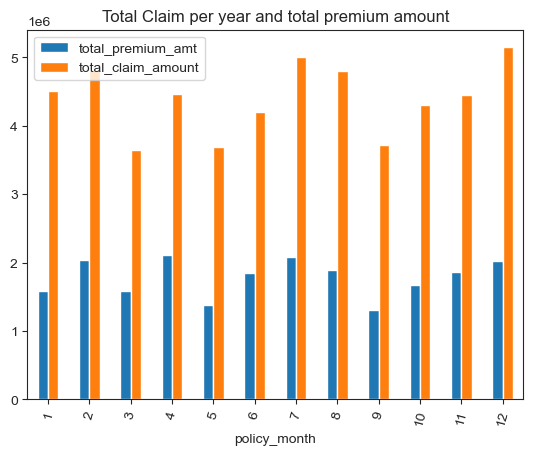

In [57]:
monthly_premium_claim.plot(kind= 'bar', rot = 75, title= 'Total Claim per year and total premium amount');

### Claims vs month

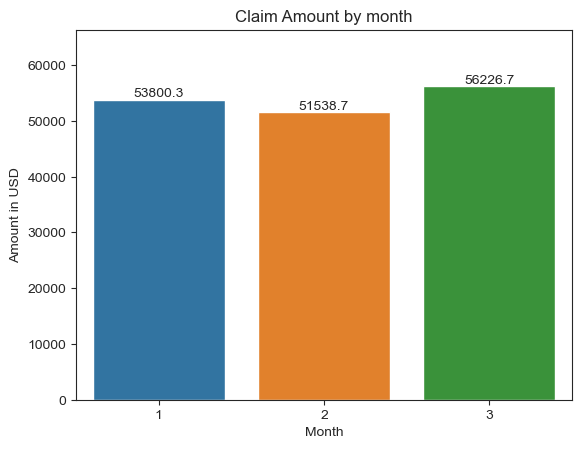

In [58]:
claims_amt_month_plot = sns.barplot(x= 'incident_month', y= 'total_claim_amount', data = insurance_claims_raw_df, errwidth=0)
plt.title('Claim Amount by month')
#plt.xticks(rotation = 75)
plt.xlabel('Month')
plt.ylabel('Amount in USD');

for i in claims_amt_month_plot.containers:
    claims_amt_month_plot.bar_label(i,)

## Annual Premium Information

In [59]:
def years_as_customer(col_series):
    years = []
    for idx, values in col_series.items():
        nyear = values // 12
        years.append(nyear)
    
    return years

In [60]:
insurance_claims_raw_df.insert(1, 'years_as_customer', years_as_customer(insurance_claims_raw_df.months_as_customer))

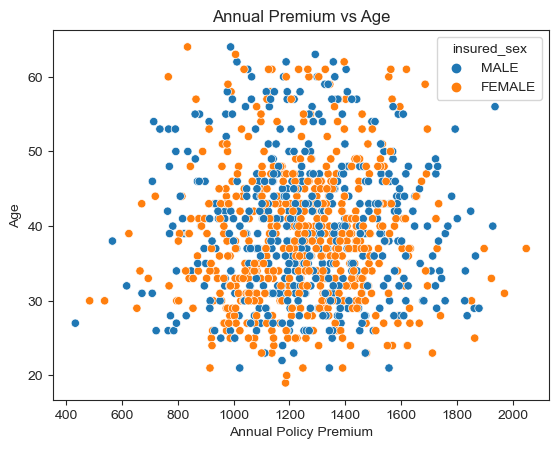

In [61]:
sns.scatterplot(x= insurance_claims_raw_df.policy_annual_premium, y= insurance_claims_raw_df.age, hue = 'insured_sex', data = insurance_claims_raw_df)
plt.title('Annual Premium vs Age')
plt.xlabel('Annual Policy Premium')
plt.ylabel('Age');

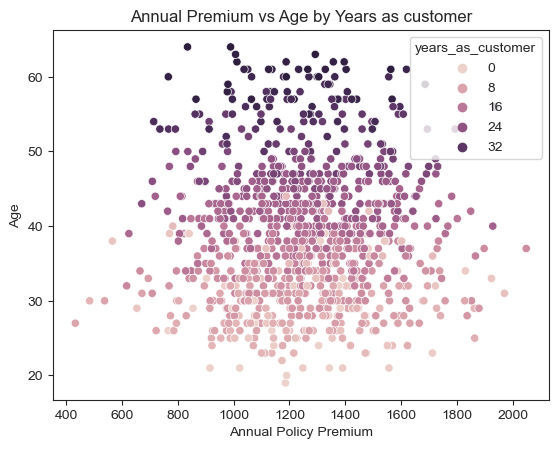

In [62]:
sns.scatterplot(x= insurance_claims_raw_df.policy_annual_premium, y= insurance_claims_raw_df.age, hue = 'years_as_customer', data = insurance_claims_raw_df)
plt.title('Annual Premium vs Age by Years as customer')
plt.xlabel('Annual Policy Premium')
plt.ylabel('Age');

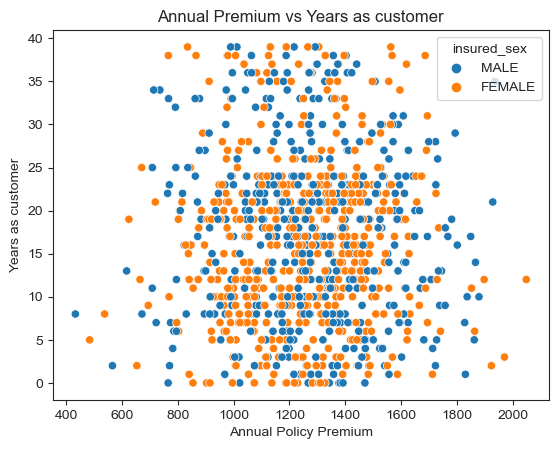

In [63]:
sns.scatterplot(x= insurance_claims_raw_df.policy_annual_premium, y= insurance_claims_raw_df.years_as_customer, hue= 'insured_sex', data = insurance_claims_raw_df)
plt.title('Annual Premium vs Years as customer')
plt.xlabel('Annual Policy Premium')
plt.ylabel('Years as customer');

<AxesSubplot:title={'center':'Annual Premium vs Total Claim Amount'}, xlabel='policy_annual_premium', ylabel='total_claim_amount'>

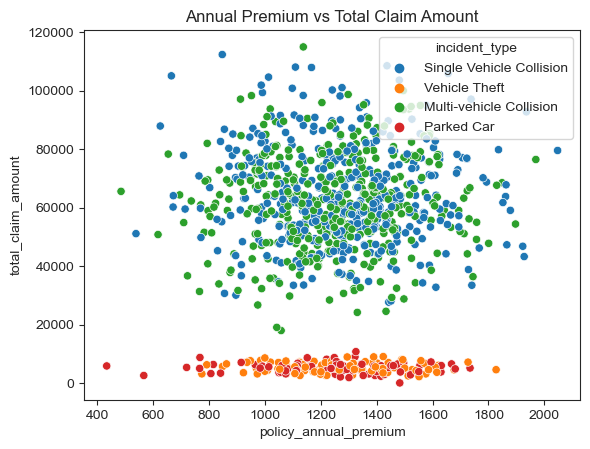

In [64]:
plt.title('Annual Premium vs Total Claim Amount')
sns.scatterplot(x= 'policy_annual_premium', y= 'total_claim_amount', hue= 'incident_type', data = insurance_claims_raw_df)

### Yearly Mean Premium

In [65]:
policy_year

Int64Index([2014, 2006, 2000, 1990, 2014, 2006, 2000, 1990, 1997, 2011,
            ...
            1994, 2006, 2007, 2001, 2007, 1991, 2014, 2003, 2011, 1996],
           dtype='int64', name='policy_bind_date', length=1000)

In [66]:
policy_year_ordered = insurance_claims_raw_df.policy_year.sort_values(ascending=True)
policy_year_ordered.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015], dtype=int64)

In [67]:
yearly_mean_premium = insurance_claims_raw_df.groupby('policy_year')['policy_annual_premium'].mean()
yearly_mean_premium

policy_year
1990    1217.030000
1991    1317.904000
1992    1273.705000
1993    1257.713333
1994    1253.132195
1995    1308.872821
1996    1279.215349
1997    1223.470227
1998    1211.044333
1999    1232.163750
2000    1244.199032
2001    1232.890976
2002    1258.969600
2003    1218.975676
2004    1267.571111
2005    1204.303500
2006    1227.669268
2007    1213.929500
2008    1273.762121
2009    1308.318140
2010    1299.779474
2011    1228.099062
2012    1274.879722
2013    1284.967714
2014    1268.234186
2015    1242.830000
Name: policy_annual_premium, dtype: float64

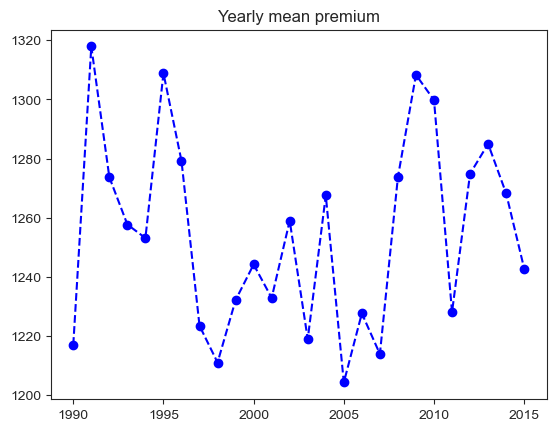

In [68]:
plt.title('Yearly mean premium')
plt.plot(policy_year_ordered.unique(), yearly_mean_premium, "o--b");

## Authorities Contacted

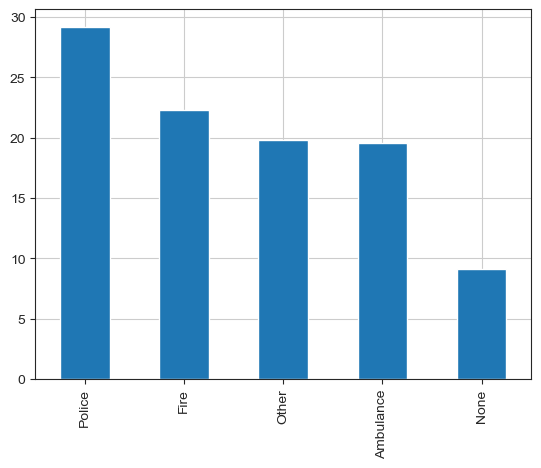

In [69]:
authorities_pct = insurance_claims_raw_df.authorities_contacted.value_counts()*100/insurance_claims_raw_df.authorities_contacted.count()
authorities_pct.plot(kind= 'bar', grid= True);

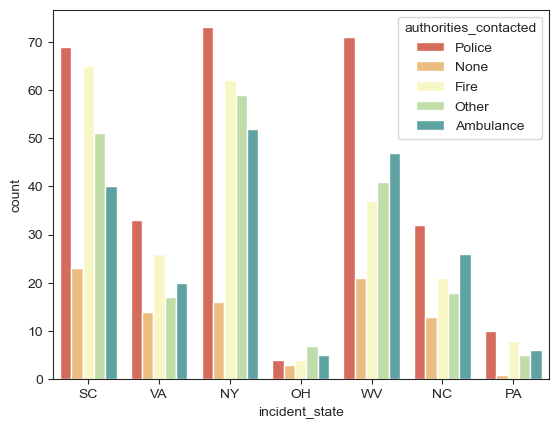

In [70]:
sns.countplot(x= 'incident_state', hue= 'authorities_contacted', data = insurance_claims_raw_df, palette= 'Spectral');

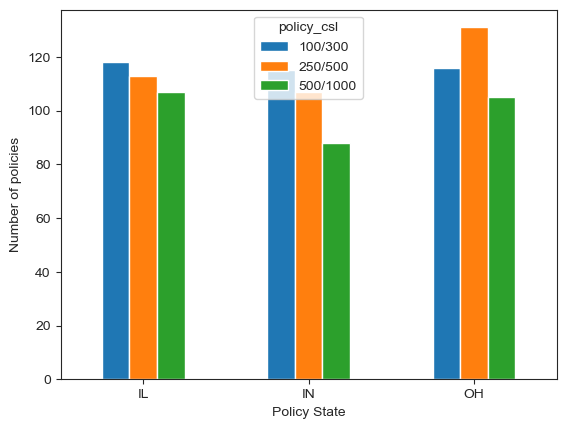

In [71]:
pd.crosstab(insurance_claims_raw_df.policy_state, insurance_claims_raw_df.policy_csl).plot(kind = 'bar', rot = 0)
plt.ylabel('Number of policies')
plt.xlabel('Policy State');

### Fraud Information

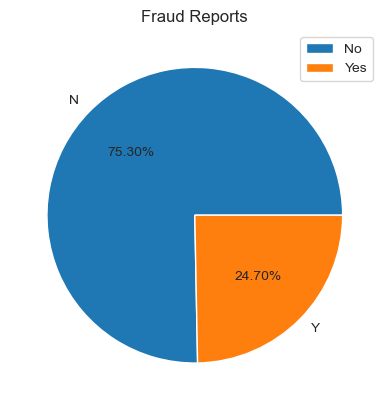

In [72]:
plt.title('Fraud Reports')
plt.pie(insurance_claims_raw_df.fraud_reported.value_counts(),  labels= insurance_claims_raw_df.fraud_reported.value_counts().index, autopct='%.02f%%')
plt.legend(['No', 'Yes']);

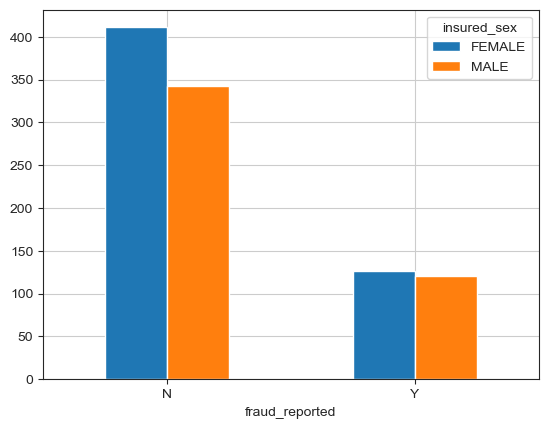

In [73]:
pd.crosstab(insurance_claims_raw_df.fraud_reported, insurance_claims_raw_df.insured_sex).plot(kind= 'bar', grid = True, rot = 0);

## Some exploratory questions:

Is the claim amount more when there a collision incident?

In [74]:
que1 = insurance_claims_raw_df.groupby('collision_type')['total_claim_amount'].mean()
que1

collision_type
Front Collision    64658.267717
Not a collision     5418.595506
Rear Collision     61705.000000
Side Collision     62885.398551
Name: total_claim_amount, dtype: float64

Is the claim amount more when there are higher number of witnesses?

In [75]:
que2 = insurance_claims_raw_df.groupby('witnesses')['total_claim_amount'].mean()
que2

witnesses
0    54199.879518
1    50482.596899
2    54473.040000
3    51948.148148
Name: total_claim_amount, dtype: float64

Are there higher annual premiums for states with higher count of insured people caught in a accident?

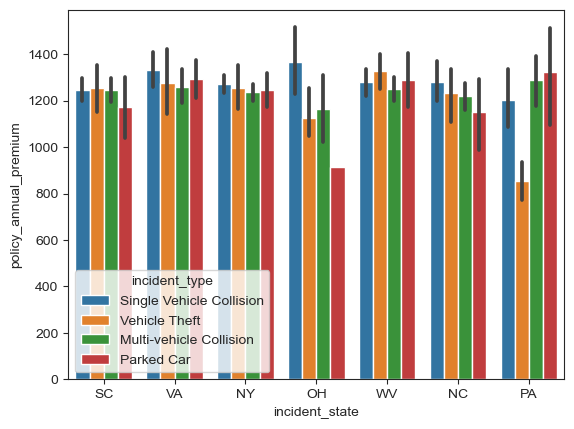

In [76]:
que3 = insurance_claims_raw_df.groupby('incident_state')['policy_annual_premium'].mean()
sns.barplot(x= 'incident_state', y= 'policy_annual_premium', hue= 'incident_type', data = insurance_claims_raw_df);

In [77]:
pd.crosstab(insurance_claims_raw_df.incident_state, insurance_claims_raw_df.incident_type)

incident_type,Multi-vehicle Collision,Parked Car,Single Vehicle Collision,Vehicle Theft
incident_state,,,,
NC,43,10,43,14
NY,119,16,112,15
OH,12,1,7,3
PA,15,4,9,2
SC,103,22,105,18
VA,41,11,44,14
WV,86,20,83,28


In [78]:
insurance_claims_raw_df.incident_state.value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64